***Welcome my Orages-Grapefruit Kernel
> in this  kernel we will analize and compile oranges-grapefruit data with using Keras ANN



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/oranges-vs-grapefruit/citrus.csv


In [2]:
data=pd.read_csv("../input/oranges-vs-grapefruit/citrus.csv")

In [3]:
data.head(10)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
5,orange,4.59,95.86,142,100,2
6,orange,4.64,97.94,156,85,2
7,orange,4.65,98.50,142,74,2
8,orange,4.68,100.20,159,90,16
9,orange,4.69,100.31,161,76,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
name        10000 non-null object
diameter    10000 non-null float64
weight      10000 non-null float64
red         10000 non-null int64
green       10000 non-null int64
blue        10000 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [5]:
data.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [6]:
x=data.iloc[:,1:]
y=pd.DataFrame([1 if each=="orange" else 0 for each in data["name"]],columns=["features"])

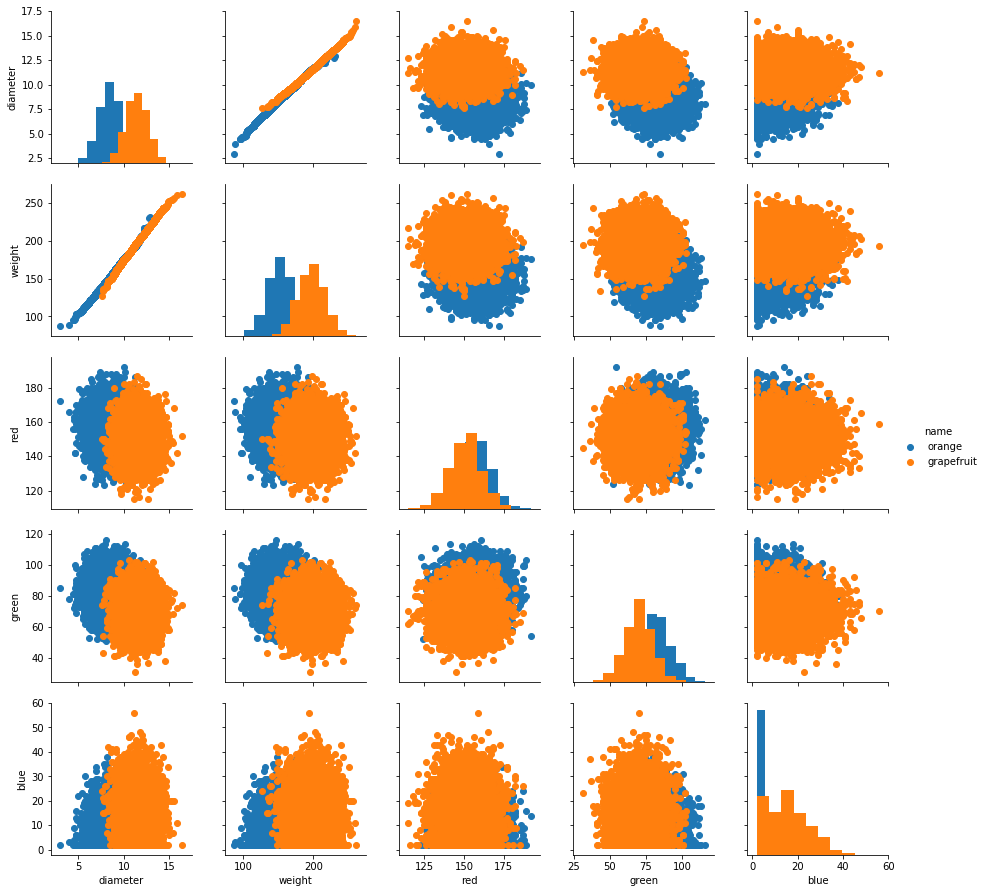

In [7]:
g=sns.PairGrid(data,hue="name")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)

In [9]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [10]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Using TensorFlow backend.


Epoch 1/100
5333/5333 [==============================] - 1s 123us/step - loss: 0.6452 - accuracy: 0.7461
Epoch 2/100
5333/5333 [==============================] - 0s 52us/step - loss: 0.3193 - accuracy: 0.9265
Epoch 3/100
5333/5333 [==============================] - 0s 53us/step - loss: 0.1976 - accuracy: 0.9257
Epoch 4/100
5333/5333 [==============================] - 0s 52us/step - loss: 0.1864 - accuracy: 0.9259
Epoch 5/100
5333/5333 [==============================] - 0s 52us/step - loss: 0.1843 - accuracy: 0.9267
Epoch 6/100
5333/5333 [==============================] - 0s 52us/step - loss: 0.1835 - accuracy: 0.9254
Epoch 7/100
5333/5333 [==============================] - 0s 51us/step - loss: 0.1833 - accuracy: 0.9259
Epoch 8/100
5333/5333 [==============================] - 0s 51us/step - loss: 0.1828 - accuracy: 0.9256
Epoch 9/100
5333/5333 [==============================] - 0s 53us/step - loss: 0.1825 - accuracy: 0.9274
Epoch 10/100
5333/5333 [==============================] - 0s 53

In [11]:
#fit the models
classifier.fit(x_train, y_train, 
               batch_size = 60, 
               epochs = 100, verbose=2)

Epoch 1/100
 - 0s - loss: 0.6615 - accuracy: 0.7300
Epoch 2/100
 - 0s - loss: 0.3776 - accuracy: 0.9252
Epoch 3/100
 - 0s - loss: 0.2115 - accuracy: 0.9269
Epoch 4/100
 - 0s - loss: 0.1874 - accuracy: 0.9273
Epoch 5/100
 - 0s - loss: 0.1832 - accuracy: 0.9273
Epoch 6/100
 - 0s - loss: 0.1819 - accuracy: 0.9268
Epoch 7/100
 - 0s - loss: 0.1808 - accuracy: 0.9265
Epoch 8/100
 - 0s - loss: 0.1804 - accuracy: 0.9262
Epoch 9/100
 - 0s - loss: 0.1802 - accuracy: 0.9268
Epoch 10/100
 - 0s - loss: 0.1798 - accuracy: 0.9270
Epoch 11/100
 - 0s - loss: 0.1793 - accuracy: 0.9262
Epoch 12/100
 - 0s - loss: 0.1790 - accuracy: 0.9270
Epoch 13/100
 - 0s - loss: 0.1788 - accuracy: 0.9270
Epoch 14/100
 - 0s - loss: 0.1787 - accuracy: 0.9269
Epoch 15/100
 - 0s - loss: 0.1784 - accuracy: 0.9270
Epoch 16/100
 - 0s - loss: 0.1783 - accuracy: 0.9274
Epoch 17/100
 - 0s - loss: 0.1783 - accuracy: 0.9281
Epoch 18/100
 - 0s - loss: 0.1780 - accuracy: 0.9283
Epoch 19/100
 - 0s - loss: 0.1775 - accuracy: 0.9285
Ep

In [12]:
#x_test accuracy
print(classifier.score(x_test,y_test))

2000/2000 [==============================] - 0s 37us/step
0.953499972820282


In [13]:
y_output=classifier.predict(x)